In [41]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean, median

# balanceo de datos
from imblearn import under_sampling, over_sampling
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek

# evaluacion de modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix, f1_score

# kmeans
from sklearn.cluster import KMeans

# librerias para modelos
from sklearn import tree
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
# lectura de datos
datos = pd.read_csv("C:/Users/brand/Downloads/CASO_DS/datos.csv")

In [3]:
datos.head()

,transaction_id,timestamp,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,...,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
0,99899e9e02c4b41fc442744220e6fa12f8d36b26f70027...,155270.0,12.00,-0.071330,-0.032900,0.109989,0.339889,-0.626131,-0.116853,1.220826,...,-0.168169,-1.054944,-1.603176,-0.616640,2.283078,0.373964,1.576543,-0.941557,-0.105280,0
1,d678605da2ed45d14c95228b2e6a0daa1c635c7c5d3f7c...,46054.0,208.89,0.057858,0.003669,0.076745,0.392782,0.458835,-0.279094,0.435257,...,-1.606923,-1.100937,0.597263,-1.228029,0.875399,0.260934,-0.558290,0.763729,0.011740,0
2,5f178ebbecf592c3ea98b5b26ff3547f8a40e88aa428d5...,167866.0,1.00,-0.002449,0.019520,-0.038565,0.400659,-1.214922,-0.177434,0.303247,...,1.044934,0.533274,-2.802382,0.570268,2.121604,-0.131120,1.603304,-0.032323,0.062465,0
3,455543a8012484e430efd18300186319bf8da376811333...,163539.0,15.00,-0.039202,-0.031762,-0.328682,-0.045094,0.606368,0.204822,0.014322,...,0.020468,-0.853713,-1.915028,-0.478400,2.161957,-1.117518,1.768693,-0.517470,-0.101639,0
4,d8637ef4c5c833fee92149b5b8ef2fad601196be9b7c89...,153872.0,0.01,-0.058206,-0.051926,0.653525,-0.387901,0.806301,0.227390,0.676840,...,-0.750013,-0.914675,-0.595874,-0.705751,2.026529,2.221984,0.744251,-0.768323,-0.166163,0


In [4]:
# eliminación de columnas transaction_id y timestamp
clean_columns = ["amount"]
for i in range(1,9):
    clean_columns.append(f'variable_0{i}')
for i in range(10,33):
    clean_columns.append(f'variable_{i}')
clean_columns.append("is_fraud")
print(clean_columns)

['amount', 'variable_01', 'variable_02', 'variable_03', 'variable_04', 'variable_05', 'variable_06', 'variable_07', 'variable_08', 'variable_10', 'variable_11', 'variable_12', 'variable_13', 'variable_14', 'variable_15', 'variable_16', 'variable_17', 'variable_18', 'variable_19', 'variable_20', 'variable_21', 'variable_22', 'variable_23', 'variable_24', 'variable_25', 'variable_26', 'variable_27', 'variable_28', 'variable_29', 'variable_30', 'variable_31', 'variable_32', 'is_fraud']


In [5]:
clean_df = datos[clean_columns]
clean_df.head()

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
0,12.00,-0.071330,-0.032900,0.109989,0.339889,-0.626131,-0.116853,1.220826,0.394041,0.700084,...,-0.168169,-1.054944,-1.603176,-0.616640,2.283078,0.373964,1.576543,-0.941557,-0.105280,0
1,208.89,0.057858,0.003669,0.076745,0.392782,0.458835,-0.279094,0.435257,0.230350,0.624199,...,-1.606923,-1.100937,0.597263,-1.228029,0.875399,0.260934,-0.558290,0.763729,0.011740,0
2,1.00,-0.002449,0.019520,-0.038565,0.400659,-1.214922,-0.177434,0.303247,0.030461,-0.307426,...,1.044934,0.533274,-2.802382,0.570268,2.121604,-0.131120,1.603304,-0.032323,0.062465,0
3,15.00,-0.039202,-0.031762,-0.328682,-0.045094,0.606368,0.204822,0.014322,0.013439,0.861519,...,0.020468,-0.853713,-1.915028,-0.478400,2.161957,-1.117518,1.768693,-0.517470,-0.101639,0
4,0.01,-0.058206,-0.051926,0.653525,-0.387901,0.806301,0.227390,0.676840,0.209482,0.367224,...,-0.750013,-0.914675,-0.595874,-0.705751,2.026529,2.221984,0.744251,-0.768323,-0.166163,0


In [43]:
# estadísticas sobre los datos
amounts = clean_df["amount"]
max_amount = max(amounts)
min_amount = min(amounts)
mean_amount = mean(amounts)
median_amount = median(amounts)
print(f"max:\t{max_amount}\nmin:\t{min_amount}\nmean:\t{mean_amount}\nmedian:\t{median_amount}")

max:	25691.16
min:	0.0
mean:	88.34961925093133
median:	22.0


In [7]:
fraud = clean_df.loc[clean_df["is_fraud"]==1]
fraud.head()

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
19,237.26,0.082337,-0.054988,0.044033,0.803110,0.215683,0.335821,1.187013,0.220526,0.982729,...,-0.661836,1.449792,-5.774530,-2.714268,-6.682832,0.149713,-3.453894,1.086850,-0.175960,1
36,30.31,-0.711066,-2.498300,-0.167808,-0.743909,0.519952,-0.412861,-0.266162,2.761157,0.623797,...,-11.731476,10.648505,-18.256576,7.352148,-13.086519,-0.570548,-14.750615,-9.386073,-7.994561,1
1047,119.74,-0.946184,-0.297557,0.420919,-0.104925,-0.536294,0.286258,0.228484,1.128472,1.525732,...,-4.409844,8.416295,-9.775528,5.678134,-5.552122,1.431125,-7.533836,-12.489634,-0.952182,1
1089,0.00,0.323740,0.476629,0.064558,0.345419,-0.007013,-0.064175,-0.931072,0.109185,-1.796739,...,1.617041,5.543972,-6.161997,3.057250,1.183931,0.219496,0.862312,4.273370,1.525214,1
2194,238.90,-0.131525,1.249414,-0.251744,-0.144967,0.292539,-0.440387,-0.183001,0.801312,1.233044,...,-1.875486,3.920748,-3.917586,0.194121,-4.198735,-0.855930,-4.975401,-1.736125,3.998124,1


In [45]:
# estadísticas sobre las transacciones fraudulentas
fraud_amounts = fraud["amount"]
max_fraud_amount = max(fraud_amounts)
min_fraud_amount = min(fraud_amounts)
mean_fraud_amount = mean(fraud_amounts)
median_fraud_amount = median(fraud_amounts)
print(f"max_fraud_amount:\t{max_fraud_amount}\nmin_fraud_amount:\t{min_fraud_amount}\nmean_fraud_amount:\t{mean_fraud_amount}\nmedian:\t{median_fraud_amount}")

max_fraud_amount:	2125.87
min_fraud_amount:	0.0
mean_fraud_amount:	122.21132113821139
median:	9.25


In [9]:
# estadísticas sobre las transacciones no fraudulentas
not_fraud = clean_df.loc[clean_df["is_fraud"]==0]
not_fraud.head()

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
0,12.00,-0.071330,-0.032900,0.109989,0.339889,-0.626131,-0.116853,1.220826,0.394041,0.700084,...,-0.168169,-1.054944,-1.603176,-0.616640,2.283078,0.373964,1.576543,-0.941557,-0.105280,0
1,208.89,0.057858,0.003669,0.076745,0.392782,0.458835,-0.279094,0.435257,0.230350,0.624199,...,-1.606923,-1.100937,0.597263,-1.228029,0.875399,0.260934,-0.558290,0.763729,0.011740,0
2,1.00,-0.002449,0.019520,-0.038565,0.400659,-1.214922,-0.177434,0.303247,0.030461,-0.307426,...,1.044934,0.533274,-2.802382,0.570268,2.121604,-0.131120,1.603304,-0.032323,0.062465,0
3,15.00,-0.039202,-0.031762,-0.328682,-0.045094,0.606368,0.204822,0.014322,0.013439,0.861519,...,0.020468,-0.853713,-1.915028,-0.478400,2.161957,-1.117518,1.768693,-0.517470,-0.101639,0
4,0.01,-0.058206,-0.051926,0.653525,-0.387901,0.806301,0.227390,0.676840,0.209482,0.367224,...,-0.750013,-0.914675,-0.595874,-0.705751,2.026529,2.221984,0.744251,-0.768323,-0.166163,0


In [10]:
non_fraud_amounts = not_fraud["amount"]
max_non_fraud_amount = max(non_fraud_amounts)
min_non_fraud_amount = min(non_fraud_amounts)
mean_non_fraud_amount = mean(non_fraud_amounts)
print(f"max_non_fraud_amount:\t{max_non_fraud_amount}\nmin_non_fraud_amount:\t{min_non_fraud_amount}\nmean_non_fraud_amount:\t{mean_non_fraud_amount}")

max_non_fraud_amount:	25691.16
min_non_fraud_amount:	0.0
mean_non_fraud_amount:	88.29102242231328


In [11]:
# reducción de dimensionalidad con PCA
columns = clean_df.columns.drop("is_fraud")
X = clean_df[columns]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca)
pca_df.columns = ['PC1', 'PC2']

In [12]:
pca_df.head(10)

,PC1,PC2
0,-76.350929,-0.930377
1,120.541882,0.744548
2,-87.352758,-0.015370
3,-73.350850,-0.505596
4,-88.340341,-0.754959
5,-83.360524,0.398506
6,42.842656,-0.396198
7,-87.464683,-0.637113
8,-69.371214,1.774830
9,-87.352099,0.498525


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

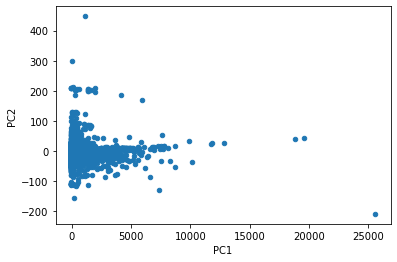

In [13]:
# gráfica de dispersión de los datos
pca_df.plot.scatter(x="PC1", y="PC2")

In [14]:
# implementación de kmeans
km = KMeans(n_clusters=2, init='k-means++', n_init=1, max_iter=1000, tol=0.00001)
y_km = km.fit_predict(X)

In [15]:
clusters_df = clean_df.copy()
clusters_df['cluster'] = y_km
pca_df['cluster'] = y_km
pca_df['clase'] = clean_df['is_fraud']

In [16]:
clusters_df.head()

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud,cluster
0,12.00,-0.071330,-0.032900,0.109989,0.339889,-0.626131,-0.116853,1.220826,0.394041,0.700084,...,-1.054944,-1.603176,-0.616640,2.283078,0.373964,1.576543,-0.941557,-0.105280,0,0
1,208.89,0.057858,0.003669,0.076745,0.392782,0.458835,-0.279094,0.435257,0.230350,0.624199,...,-1.100937,0.597263,-1.228029,0.875399,0.260934,-0.558290,0.763729,0.011740,0,0
2,1.00,-0.002449,0.019520,-0.038565,0.400659,-1.214922,-0.177434,0.303247,0.030461,-0.307426,...,0.533274,-2.802382,0.570268,2.121604,-0.131120,1.603304,-0.032323,0.062465,0,0
3,15.00,-0.039202,-0.031762,-0.328682,-0.045094,0.606368,0.204822,0.014322,0.013439,0.861519,...,-0.853713,-1.915028,-0.478400,2.161957,-1.117518,1.768693,-0.517470,-0.101639,0,0
4,0.01,-0.058206,-0.051926,0.653525,-0.387901,0.806301,0.227390,0.676840,0.209482,0.367224,...,-0.914675,-0.595874,-0.705751,2.026529,2.221984,0.744251,-0.768323,-0.166163,0,0


In [17]:
clusters_df.to_csv('C:/Users/brand/Downloads/CASO_DS/clusters.csv')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

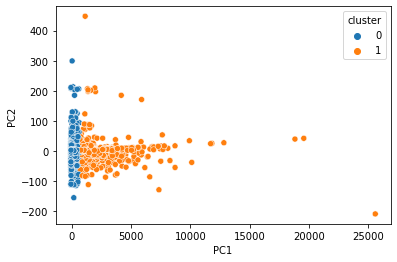

In [18]:
# mostrar clústers encontrados
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster', data = pca_df)

In [19]:
clean_df.groupby('is_fraud').count()

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [20]:
clusters_df.groupby('cluster').count()

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
cluster,,,,,,,,,,,,,,,,,,,,,
0,279581,279581,279581,279581,279581,279581,279581,279581,279581,279581,...,279581,279581,279581,279581,279581,279581,279581,279581,279581,279581
1,5226,5226,5226,5226,5226,5226,5226,5226,5226,5226,...,5226,5226,5226,5226,5226,5226,5226,5226,5226,5226


In [21]:
# cálculo de errores por clúster
is_fraud_c = clusters_df["is_fraud"]
cluster_c = clusters_df["cluster"]
cont_0 = 0
cont_1 = 0
for i in range(clusters_df.shape[0]):
    if is_fraud_c[i] == 0 and cluster_c[i] == 1:
        cont_0+=1
    elif is_fraud_c[i] == 1 and cluster_c[i] == 0:
        cont_1+=1
print(cont_0)
print(cont_1)

5208
474


In [22]:
y_column = "is_fraud"
final_columns = clean_df.columns.drop(y_column)

In [23]:
# functiones para resampling
def under_sample(X, y, method = 'tomek'):
    if method == 'tomek':
        under = under_sampling.TomekLinks(sampling_strategy='not minority')
    else:
        under = under_sampling.OneSidedSelection(n_neighbors=1, n_seeds_S=200)
    
    xnew, ynew = under.fit_resample(X, y)
    return xnew, ynew

def over_sample(X, y):
    # over sampling
    smote = over_sampling.SMOTE(sampling_strategy="not majority")
    X_sm, y_sm = smote.fit_resample(X, y)
    return X_sm, y_sm

In [24]:
# ejemplo de resampling
method = 'oss'
x_under, y_under = under_sample(clean_df[final_columns], clean_df['is_fraud'], method = method)

sampled_df = pd.DataFrame(x_under)
sampled_df.columns = final_columns
sampled_df[y_column] = y_under
sampled_df.to_csv(f'C:/Users/brand/Downloads/CASO_DS/under_sampled_df_{method}.csv')
sampled_df.groupby(y_column).count()

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,43452,43452,43452,43452,43452,43452,43452,43452,43452,43452,...,43452,43452,43452,43452,43452,43452,43452,43452,43452,43452
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [25]:
x_over, y_over = over_sample(clean_df[final_columns], clean_df['is_fraud'])

# crear nuevo dataframe
sampled_df = pd.DataFrame(x_over)
sampled_df.columns = final_columns
sampled_df[y_column] = y_over
sampled_df.to_csv('C:/Users/brand/Downloads/CASO_DS/over_sampled_df.csv')
sampled_df.groupby(y_column).count()

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315


In [26]:
# función para obtener sets de entrenamiento y prueba
def get_training_set(df, test_size, y_column, under = None, over = False):
    columns = df.columns.drop(y_column)
    train, test = train_test_split(df, test_size=test_size)

    xtest=test[columns].astype('float')
    ytest=test[y_column].astype('int')

    extra = ''

    xtrain = train[columns].astype('float')
    ytrain = train[y_column].astype('int')

    if over:
        print('over sampling')
        xtrain, ytrain = over_sample(xtrain, ytrain)
        extra += '_over'

    if under:
        print('under sampling')
        xtrain, ytrain = under_sample(xtrain, ytrain, method = under)
        extra += f'_{under}'

    # guardar test set en csv
    test_filename = f'C:/Users/brand/Downloads/CASO_DS/test{extra}.csv'
    test.to_csv(test_filename)

    # guardar training set en csv
    train_df = pd.DataFrame(xtrain.copy())
    train_df.columns = columns
    train_df[y_column] = ytrain

    train_filename = f'C:/Users/brand/Downloads/CASO_DS/train{extra}.csv'
    train_df.to_csv(train_filename)

    return xtrain, ytrain, xtest, ytest, train_df

In [27]:
y_column = 'is_fraud'
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = None, over = False)
train_df.groupby(y_column).count()

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,227450,227450,227450,227450,227450,227450,227450,227450,227450,227450,...,227450,227450,227450,227450,227450,227450,227450,227450,227450,227450
1,395,395,395,395,395,395,395,395,395,395,...,395,395,395,395,395,395,395,395,395,395


In [28]:
# métricas para evaluación de modelo
def evaluate_model(model, xtest, ytest, ypred = None):
    if ypred is None:
        ypred = model.predict(xtest)

    print("Precision = {:.4f}".format(precision_score(ytest, ypred, average='macro')))
    print("Recall = {:.4f}".format(recall_score(ytest, ypred, average='macro')))
    print("Accuracy = {:.4f}".format(accuracy_score(ytest, ypred)))
    #print("F1-score = {:.4f}".format(f1_score(ytest, ypred)))
    print('\nClasification Report:')
    print(classification_report(ytest, ypred))
    print(confusion_matrix(ytest, ypred))

In [29]:
def get_best_tree(xtrain, ytrain, xtest, ytest):
    tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'auto']
    }
    grid_search = GridSearchCV(estimator = tree.DecisionTreeClassifier(), 
                           param_grid = tree_params,
                           n_jobs = -1,
                           scoring="recall_macro",
                           cv=3,
                           verbose = 0
                           ) 
    grid_search.fit(xtrain, ytrain)
    print('Best tree:')
    print(grid_search.best_params_)

    modelo_arbol = grid_search.best_estimator_
    evaluate_model(modelo_arbol, xtest, ytest)

    return modelo_arbol

In [30]:
def get_best_nb(xtrain, ytrain, xtest, ytest):
    nb_params = {
    'var_smoothing': [1e-09, 1e-07, 1e-05, 1e-12]
    }
    grid_search = GridSearchCV(estimator = GaussianNB(), 
                           param_grid = nb_params,
                           n_jobs = -1,
                           scoring="recall_macro",
                           cv=3,
                           verbose = 0
                           ) 
    grid_search.fit(xtrain, ytrain)
    print('Best Naive Bayes:')
    print(grid_search.best_params_)

    modelo_nb = grid_search.best_estimator_
    evaluate_model(modelo_nb, xtest, ytest)

    return modelo_nb

In [31]:
def get_best_random_forest(xtrain, ytrain, xtest, ytest):
    rf_params = {
    'n_estimators': [10, 100, 1000],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'auto']
    }

    grid_search = GridSearchCV(estimator = RandomForestClassifier(), 
                           param_grid = rf_params,
                           n_jobs = -1,
                           scoring="recall_macro",
                           cv = 2,
                           verbose = 3
                           ) 
    grid_search.fit(xtrain, ytrain)
    print('Best random forest:')
    print(grid_search.best_params_)

    modelo_rf = grid_search.best_estimator_
    evaluate_model(modelo_rf, xtest, ytest)

    return modelo_rf

In [38]:
def get_xgboost(xtrain, ytrain, xtest, ytest):
    param = {
      'eta': 0.3, 
      'max_depth': 13,  
      'objective': 'multi:softprob',  
      'num_class': ytrain.nunique()} 

    steps = 200

    # transformar datos para xgboost
    D_train = xgb.DMatrix(xtrain, label=ytrain)
    D_test = xgb.DMatrix(xtest, label=ytest)

    modelo_xgb = xgb.train(param, D_train, steps)

    preds = modelo_xgb.predict(D_test)
    best_preds = np.asarray([np.argmax(line) for line in preds])

    print('XG Boost')
    evaluate_model(modelo_xgb, xtest, ytest, ypred=best_preds)

    return modelo_xgb

In [33]:
y_column = 'is_fraud'
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = None, over = False)
display(train_df.groupby(y_column).count())
modelo_arbol = get_best_tree(xtrain, ytrain, xtest, ytest)
print()
print('-------'*12)
print()
modelo_nb = get_best_nb(xtrain, ytrain, xtest, ytest)
print()
print('-------'*12)
print()

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,227452,227452,227452,227452,227452,227452,227452,227452,227452,227452,...,227452,227452,227452,227452,227452,227452,227452,227452,227452,227452
1,393,393,393,393,393,393,393,393,393,393,...,393,393,393,393,393,393,393,393,393,393


Best tree:
{'criterion': 'entropy', 'max_features': None}
Precision = 0.9125
Recall = 0.9291
Accuracy = 0.9994

Clasification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.86      0.84        99

    accuracy                           1.00     56962
   macro avg       0.91      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56845    18]
 [   14    85]]

------------------------------------------------------------------------------------

Best Naive Bayes:
{'var_smoothing': 1e-07}
Precision = 0.5333
Recall = 0.9435
Accuracy = 0.9778

Clasification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.07      0.91      0.12        99

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0

In [34]:
y_column = 'is_fraud'
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = 'oss', over = False)
display(train_df.groupby(y_column).count())
modelo_arbol = get_best_tree(xtrain, ytrain, xtest, ytest)
print()
print('-------'*12)
print()
modelo_nb = get_best_nb(xtrain, ytrain, xtest, ytest)
print()
print('-------'*12)
print()
#print()
#modelo_xgb = get_xgboost(xtrain, ytrain, xtest, ytest)b

under sampling


,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,34007,34007,34007,34007,34007,34007,34007,34007,34007,34007,...,34007,34007,34007,34007,34007,34007,34007,34007,34007,34007
1,394,394,394,394,394,394,394,394,394,394,...,394,394,394,394,394,394,394,394,394,394


Best tree:
{'criterion': 'gini', 'max_features': None}
Precision = 0.7481
Recall = 0.8769
Accuracy = 0.9983

Clasification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.50      0.76      0.60        98

    accuracy                           1.00     56962
   macro avg       0.75      0.88      0.80     56962
weighted avg       1.00      1.00      1.00     56962

[[56789    75]
 [   24    74]]

------------------------------------------------------------------------------------

Best Naive Bayes:
{'var_smoothing': 1e-07}
Precision = 0.5606
Recall = 0.8729
Accuracy = 0.9902

Clasification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.12      0.76      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.87      0.60     56962
weighted avg       1.00      0.99

In [35]:
y_column = 'is_fraud'
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = None, over = True)
display(train_df.groupby(y_column).count())
modelo_arbol = get_best_tree(xtrain, ytrain, xtest, ytest)
print()
print('-------'*12)
print()
modelo_nb = get_best_nb(xtrain, ytrain, xtest, ytest)
print()
print('-------'*12)
print()
#print()
#modelo_xgb = get_xgboost(xtrain, ytrain, xtest, ytest)b

over sampling


,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_10,...,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,227453,227453,227453,227453,227453,227453,227453,227453,227453,227453,...,227453,227453,227453,227453,227453,227453,227453,227453,227453,227453
1,227453,227453,227453,227453,227453,227453,227453,227453,227453,227453,...,227453,227453,227453,227453,227453,227453,227453,227453,227453,227453


Best tree:
{'criterion': 'entropy', 'max_features': 'sqrt'}
Precision = 0.7188
Recall = 0.9390
Accuracy = 0.9978

Clasification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.44      0.88      0.58       100

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962

[[56749   113]
 [   12    88]]

------------------------------------------------------------------------------------

Best Naive Bayes:
{'var_smoothing': 1e-09}
Precision = 0.5291
Recall = 0.9469
Accuracy = 0.9738

Clasification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56862
           1       0.06      0.92      0.11       100

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00     

In [ ]:
y_column = 'is_fraud'
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = 'oss', over = True)
display(train_df.groupby(y_column).count())
modelo_arbol = get_best_tree(xtrain, ytrain, xtest, ytest)
print()
print('-------'*12)
print()
modelo_nb = get_best_nb(xtrain, ytrain, xtest, ytest)
print()
print('-------'*12)
print()
#print()
#modelo_xgb = get_xgboost(xtrain, ytrain, xtest, ytest)b

In [ ]:
y_column = 'is_fraud'
# test 1
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = None, over = False)
modelo_rf = get_best_random_forest(xtrain, ytrain, xtest, ytest)
# test 2
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = 'oss', over = False)
modelo_rf = get_best_random_forest(xtrain, ytrain, xtest, ytest)
# test 3
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = None, over = True)
modelo_rf = get_best_random_forest(xtrain, ytrain, xtest, ytest)
# test 4
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = 'oss', over = True)
modelo_rf = get_best_random_forest(xtrain, ytrain, xtest, ytest)
print()
print('-------'*12)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


In [40]:
y_column = 'is_fraud'
# test 1
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = None, over = False)
modelo_xgb = get_xgboost(xtrain, ytrain, xtest, ytest)
# test 2
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = 'oss', over = False)
modelo_xgb = get_xgboost(xtrain, ytrain, xtest, ytest)
# test 3
xtrain, ytrain, xtest, ytest, train_df = get_training_set(clean_df, 0.2, y_column, under = None, over = True)
modelo_xgb = get_xgboost(xtrain, ytrain, xtest, ytest)

[10:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost
Precision = 0.9813
Recall = 0.8861
Accuracy = 0.9995

Clasification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.96      0.77      0.86       101

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56858     3]
 [   23    78]]
under sampling
[10:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm